<a id="section-one"></a>
## Importing Dependencies

In [ ]:
import keras
from keras.datasets import cifar10,cifar100
from keras.models import Sequential
from keras import datasets, layers, models
from keras.utils import np_utils
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

CIFAR_10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

Reading the CIFAR-10 dataset from Keras datasets & setting train and test data

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


<a id="section-three"></a>
## EDA (Exploratory Data Analysis)

In [ ]:
# Checking the number of rows (records) and columns (features)
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
# Creating a list of all the class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

**Data Preprocessing**

* The reason for Standardizing/Normalizing is to convert all pixel values to values between 0 and 1.
* The reason for converting type to float is that to_categorical (one hot encoding) needs the data to be of type float by default.
* The reason for using to_categorical is that the loss function that we will be using in this code (categorical_crossentropy) when compiling the model needs data to be one hot encoded.


In [ ]:
# Converting the pixels data to float type
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
 
# Standardizing (255 is the total number of pixels an image can have)
train_images = train_images / 255
test_images = test_images / 255 

# One hot encoding the target class (labels)
num_classes = 10
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

**Building the CNN Model using Keras**

**Setting up the Layers**

In [ ]:
# Creating a sequential model and adding layers to it

model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_14 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_15 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

**Compiling the Model**
* Optimizer used during Back Propagation for weight and bias adjustment - Adam (adjusts the learning rate adaptively).
* Loss Function used - Categorical Crossentropy (used when multiple categories/classes are present).
* Metrics used for evaluation - Accuracy.

In [ ]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])


* Epochs - One epoch is one complete cycle (forward pass + backward pass).

In [ ]:
history = model.fit(train_images, train_labels, batch_size=64, epochs=100,
                    validation_data=(test_images, test_labels))

Epoch 1/100
782/782 [==============================] - 10s 12ms/step - loss: 1.7468 - accuracy: 0.3984 - val_loss: 1.7512 - val_accuracy: 0.4197
Epoch 2/100
782/782 [==============================] - 8s 11ms/step - loss: 1.1940 - accuracy: 0.5742 - val_loss: 1.0334 - val_accuracy: 0.6300
Epoch 3/100
782/782 [==============================] - 9s 11ms/step - loss: 1.0169 - accuracy: 0.6396 - val_loss: 0.8901 - val_accuracy: 0.6864
Epoch 4/100
782/782 [==============================] - 9s 11ms/step - loss: 0.9092 - accuracy: 0.6829 - val_loss: 0.8860 - val_accuracy: 0.6839
Epoch 5/100
782/782 [==============================] - 9s 11ms/step - loss: 0.8312 - accuracy: 0.7113 - val_loss: 0.6854 - val_accuracy: 0.7616
Epoch 6/100
782/782 [==============================] - 9s 11ms/step - loss: 0.7746 - accuracy: 0.7299 - val_loss: 0.7707 - val_accuracy: 0.7323
Epoch 7/100
782/782 [==============================] - 9s 11ms/step - loss: 0.7274 - accuracy: 0.7473 - val_loss: 0.7143 - val_accuracy

In [ ]:
import numpy as np


In [ ]:
print("Training Accuracy: {}".format(np.mean(history.history['accuracy'])))
print("Validation Accuracy: {}".format(np.mean(history.history['val_accuracy'])))
print("Training Loss: {}".format(np.mean(history.history['loss'])))
print("Validation Loss: {}".format(np.mean(history.history['val_loss'])))

Training Accuracy: 0.8615446016192436
Validation Accuracy: 0.8450589993596077
Training Loss: 0.39961058646440506
Validation Loss: 0.4764718061685562


**Visualizing the Evaluation**

* Loss Curve - Comparing the Training Loss with the Testing Loss over increasing Epochs.
* Accuracy Curve - Comparing the Training Accuracy with the Testing Accuracy over increasing Epochs.

Text(0.5, 1.0, 'Loss Curves')

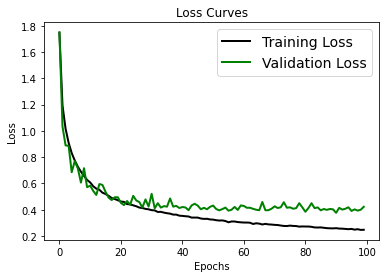

In [ ]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

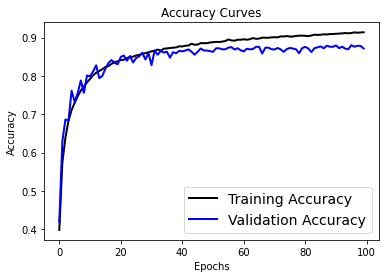

In [ ]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

**The CIFAR-100 dataset**

This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).

In [ ]:
(train_images_1, train_labels_1), (test_images_1, test_labels_1) = datasets.cifar100.load_data()

**EDA (Exploratory Data Analysis)**

In [ ]:
print(train_images_1.shape)
print(train_labels_1.shape)
print(test_images_1.shape)
print(test_labels_1.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


**Data Preprocessing**

* The reason for Standardizing/Normalizing is to convert all pixel values to values between 0 and 1.
* The reason for converting type to float is that to_categorical (one hot encoding) needs the data to be of type float by default.
* The reason for using to_categorical is that the loss function that we will be using in this code (categorical_crossentropy) when compiling the model needs data to be one hot encoded.

In [ ]:
# Converting the pixels data to float type
train_images_1 = train_images_1.astype('float32')
test_images_1 = test_images_1.astype('float32')
 
# Standardizing (255 is the total number of pixels an image can have)
train_images_1 = train_images_1 / 255
test_images_1 = test_images_1 / 255 

# One hot encoding the target class (labels)
num_classes_1 = 100
train_labels_1 = np_utils.to_categorical(train_labels_1, num_classes_1)
test_labels_1 = np_utils.to_categorical(test_labels_1, num_classes_1)

**Building the CNN Model using Keras**

**Setting up the Layers**

In [ ]:
model_1 = Sequential()

model_1.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model_1.add(layers.BatchNormalization())
model_1.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model_1.add(layers.BatchNormalization())
model_1.add(layers.MaxPooling2D(pool_size=(2,2)))
model_1.add(layers.Dropout(0.3))

model_1.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model_1.add(layers.BatchNormalization())
model_1.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model_1.add(layers.BatchNormalization())
model_1.add(layers.AveragePooling2D(pool_size=(2,2)))
model_1.add(layers.Dropout(0.5))

model_1.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model_1.add(layers.BatchNormalization())
model_1.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model_1.add(layers.BatchNormalization())
model_1.add(layers.AveragePooling2D(pool_size=(2,2)))
model_1.add(layers.Dropout(0.5))

model_1.add(layers.Flatten())
model_1.add(layers.Dense(1024, activation='relu'))
model_1.add(layers.BatchNormalization())
model_1.add(layers.Dropout(0.5))
model_1.add(layers.Dense(num_classes_1, activation='softmax'))    # num_classes_1 = 100

# Checking the model summary
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

**Compiling the Model**
* Optimizer used during Back Propagation for weight and bias adjustment - Adam (adjusts the learning rate adaptively).
* Loss Function used - Categorical Crossentropy (used when multiple categories/classes are present).
* Metrics used for evaluation - Accuracy.

In [ ]:
model_1.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

* Epochs - One epoch is one complete cycle (forward pass + backward pass)

In [ ]:
history_1 = model_1.fit(train_images_1, train_labels_1, batch_size=64, epochs=100,
                    validation_data=(test_images_1, test_labels_1))

Epoch 1/100
782/782 [==============================] - 11s 12ms/step - loss: 4.2183 - accuracy: 0.1224 - val_loss: 3.4861 - val_accuracy: 0.2116
Epoch 2/100
782/782 [==============================] - 9s 12ms/step - loss: 3.2746 - accuracy: 0.2439 - val_loss: 3.0101 - val_accuracy: 0.2757
Epoch 3/100
782/782 [==============================] - 9s 11ms/step - loss: 2.8480 - accuracy: 0.3062 - val_loss: 2.4199 - val_accuracy: 0.3815
Epoch 4/100
782/782 [==============================] - 9s 11ms/step - loss: 2.5450 - accuracy: 0.3534 - val_loss: 2.2476 - val_accuracy: 0.4199
Epoch 5/100
782/782 [==============================] - 9s 11ms/step - loss: 2.3478 - accuracy: 0.3913 - val_loss: 2.1768 - val_accuracy: 0.4416
Epoch 6/100
782/782 [==============================] - 9s 11ms/step - loss: 2.1992 - accuracy: 0.4188 - val_loss: 1.9694 - val_accuracy: 0.4748
Epoch 7/100
782/782 [==============================] - 9s 11ms/step - loss: 2.0912 - accuracy: 0.4403 - val_loss: 2.0592 - val_accuracy

In [ ]:
import numpy as np

In [ ]:
print("Training Accuracy: {}".format(np.mean(history_1.history['accuracy'])))
print("Validation Accuracy: {}".format(np.mean(history_1.history['val_accuracy'])))
print("Training Loss: {}".format(np.mean(history_1.history['loss'])))
print("Validation Loss: {}".format(np.mean(history_1.history['val_loss'])))

Training Accuracy: 0.6603883970528841
Validation Accuracy: 0.5931859987974167
Training Loss: 1.1774537771940232
Validation Loss: 1.570977212190628


**Visualizing the Evaluation**

Loss Curve - Comparing the Training Loss with the Testing Loss over increasing Epochs.
Accuracy Curve - Comparing the Training Accuracy with the Testing Accuracy over increasing Epochs.

Text(0.5, 1.0, 'Loss Curves')

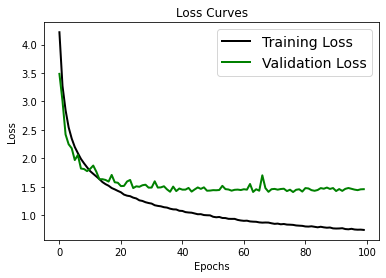

In [ ]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history_1.history['loss'], 'black', linewidth=2.0)
plt.plot(history_1.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

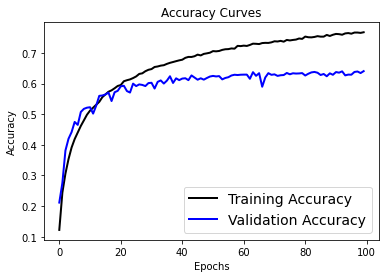

In [ ]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history_1.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history_1.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

**Outline**

**Activation Function:**

The activation function is the non linear transformation that we do over the input signal. This transformed output is then sent to the next layer of neurons as input.

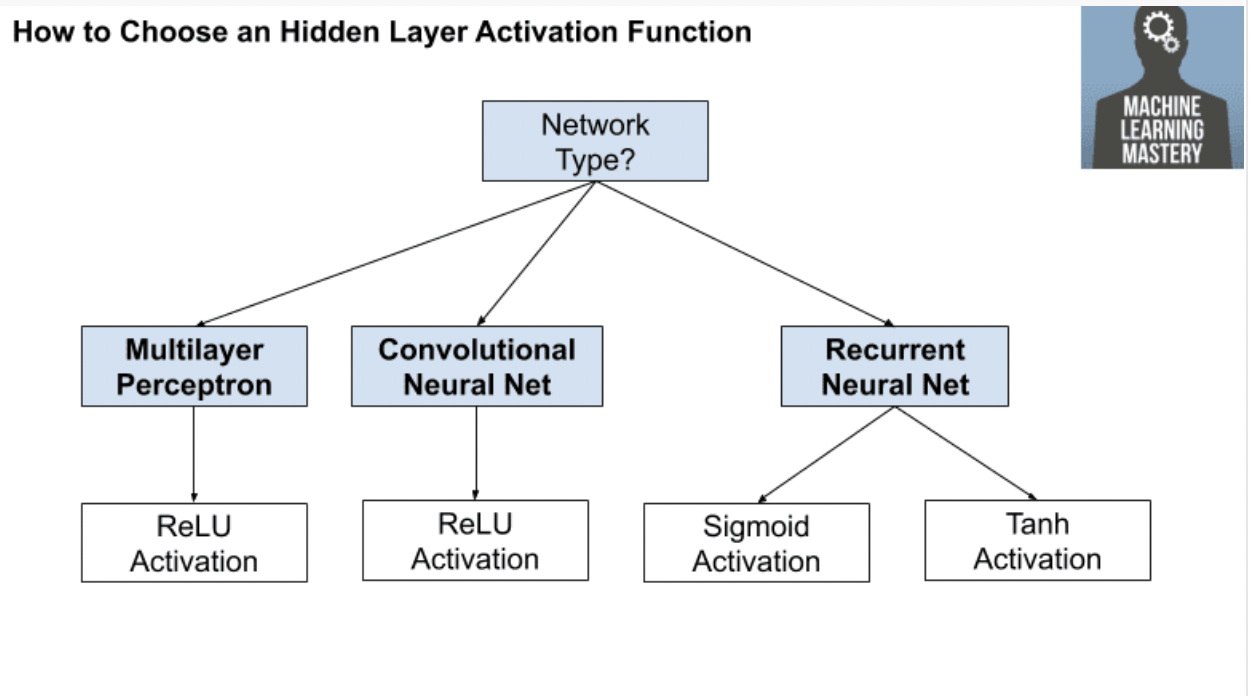
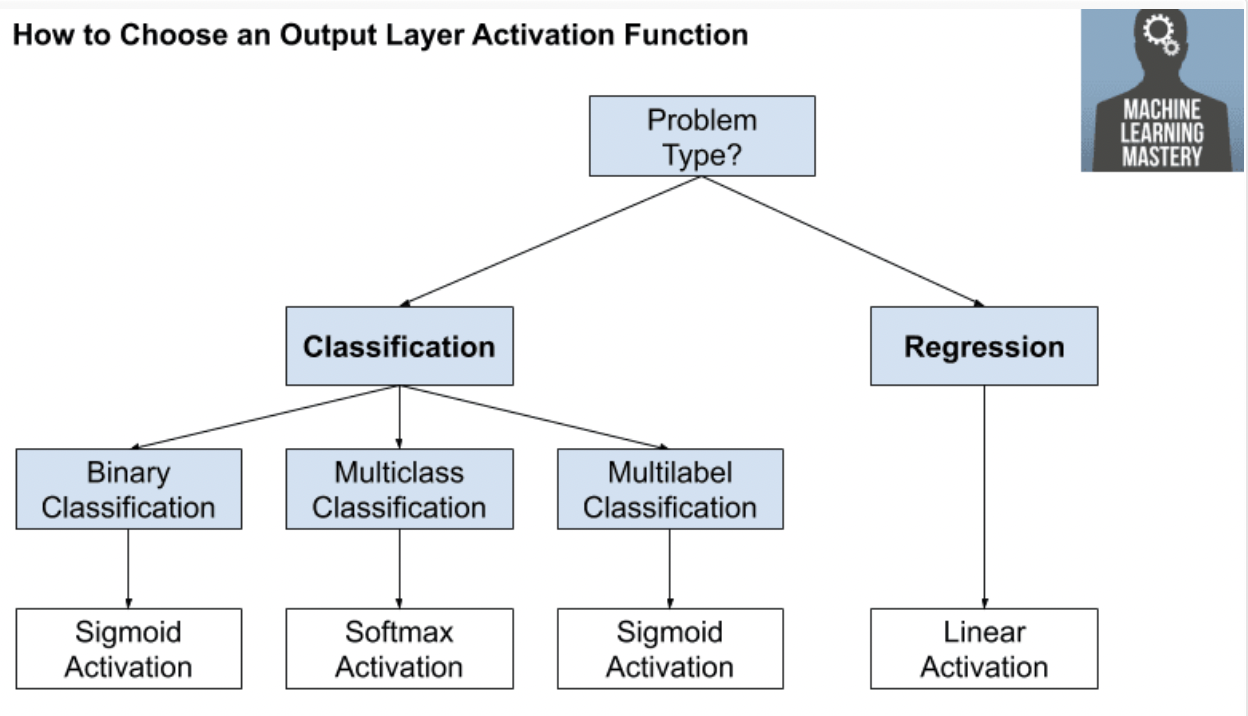

**The 2D Convolution Layer**

The most common type of convolution that is used is the 2D convolution layer and is usually abbreviated as conv2D. A filter or a kernel in a conv2D layer “slides” over the 2D input data, performing an elementwise multiplication. As a result, it will be summing up the results into a single output pixel. The kernel will perform the same operation for every location it slides over, transforming a 2D matrix of features into a different 2D matrix of features.

**Batch normalization**

Batch Norm is just another network layer that gets inserted between a hidden layer and the next hidden layer. Its job is to take the outputs from the first hidden layer and normalize them before passing them on as the input of the next hidden layer

**Pooling**

The main purpose of pooling is to reduce the size of feature maps, which in turn makes computation faster because the number of training parameters is reduced. The pooling operation summarizes the features present in a region, the size of which is determined by the pooling filter.

The three types of pooling operations are:
1.Max pooling: The maximum pixel value of the batch is selected.
2.Min pooling: The minimum pixel value of the batch is selected.
3.Average pooling: The average value of all the pixels in the batch is selected.

**Dropout**

Dropout works by randomly setting the outgoing edges of hidden units (neurons that make up hidden layers) to 0 at each update of the training phase

**Flatten**

Flattening is used to convert all the resultant 2-Dimensional arrays from pooled feature maps into a single long continuous linear vector. The flattened matrix is fed as input to the fully connected layer to classify the image

**batch size**

The batch size defines the number of samples that will be propagated through the network.

For instance, let's say you have 1050 training samples and you want to set up a batch_size equal to 100. The algorithm takes the first 100 samples (from 1st to 100th) from the training dataset and trains the network. Next, it takes the second 100 samples (from 101st to 200th) and trains the network again. We can keep doing this procedure until we have propagated all samples through of the network. Problem might happen with the last set of samples. In our example, we've used 1050 which is not divisible by 100 without remainder. The simplest solution is just to get the final 50 samples and train the network.

**epoch**

The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.

One epoch means that each sample in the training dataset has had an opportunity to update the internal model parameters. An epoch is comprised of one or more batches